# Images and convolutional networks

In this notebook, we'll cover the use of convolutional neural networks for image classification.

## Preamble: GPUs

Since these networks widely benefit from computations on GPU, you could be curious about whether GPUs will be used for the computations at stake in this notebook.

In [7]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


If you are using Google Colab and no GPU is found, enable GPUs for the notebook as follows:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

and restart the notebook.

By default, all operations in `keras` are run on GPU if a GPU is found.
If no GPU is available, the code runs on CPU without requiring any adaptation.

## LeNet and variants (shallow CNNs)

You will first experiments with rather shallow networks to get used to typical layers used in CNNs.


**Question 1.** Import the MNIST dataset and make sure it has the correct shape to feed a CNN (i.e. the dataset should 
have dimensions $(n, w, h, c)$ where $n$ is the number of images in the set, $w$ and $h$ are the width and height of an 
image and $c$ its number of channels: 1 for black & white images and 3 for RGB ones).

In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

def prepare_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train / 255.
    x_test = x_test / 255.
    x_train = x_train.reshape((-1, 28, 28, 1))
    x_test = x_test.reshape((-1, 28, 28, 1))
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = prepare_mnist()

11501568/11490434 [==============================] - 0s 0us/step


To define a CNN, you will need (at least) the following layers:
* [`Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
* [`MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)
* [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)

**Question 2.** Implement a CNN with a single convolutional layer followed by a max-pooling and a fully-connected layer. Show the number of parameters of these networks and evaluate its performance on MNIST data.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(pool_size=5),
    Flatten(),
    Dense(units=10, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=200, verbose=2, validation_data=(x_test, y_test))

Epoch 1/10
300/300 - 11s - loss: 1.0481 - accuracy: 0.7272 - val_loss: 0.4564 - val_accuracy: 0.8797 - 11s/epoch - 38ms/step
Epoch 2/10
300/300 - 2s - loss: 0.3674 - accuracy: 0.8980 - val_loss: 0.2874 - val_accuracy: 0.9213 - 2s/epoch - 5ms/step
Epoch 3/10
300/300 - 2s - loss: 0.2612 - accuracy: 0.9268 - val_loss: 0.2252 - val_accuracy: 0.9357 - 2s/epoch - 5ms/step
Epoch 4/10
300/300 - 2s - loss: 0.2123 - accuracy: 0.9390 - val_loss: 0.1867 - val_accuracy: 0.9471 - 2s/epoch - 6ms/step
Epoch 5/10
300/300 - 2s - loss: 0.1839 - accuracy: 0.9464 - val_loss: 0.1657 - val_accuracy: 0.9515 - 2s/epoch - 5ms/step
Epoch 6/10
300/300 - 2s - loss: 0.1644 - accuracy: 0.9524 - val_loss: 0.1489 - val_accuracy: 0.9565 - 2s/epoch - 5ms/step
Epoch 7/10
300/300 - 2s - loss: 0.1500 - accuracy: 0.9558 - val_loss: 0.1358 - val_accuracy: 0.9602 - 2s/epoch - 5ms/step
Epoch 8/10
300/300 - 2s - loss: 0.1397 - accuracy: 0.9586 - val_loss: 0.1261 - val_accuracy: 0.9628 - 2s/epoch - 5ms/step
Epoch 9/10
300/300 - 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (200, 26, 26, 10)         100       
                                                                 
 max_pooling2d (MaxPooling2D  (200, 5, 5, 10)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (200, 250)                0         
                                                                 
 dense (Dense)               (200, 10)                 2510      
                                                                 
Total params: 2,610
Trainable params: 2,610
Non-trainable params: 0
_________________________________________________________________


**Question 3.** Implement the following network (leNet), in which you just change the input image size (but keep the same 
hyper-parameters for convolution, pooling and dense layers):

![leNet model](https://rtavenar.github.io/assets/images/lenet.png)

Compare its performance to that of a fully connected model with the same number of parameters.

In [11]:
model = Sequential([
    Conv2D(filters=6, kernel_size=5, padding="valid", activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(filters=16, kernel_size=5, padding="valid", activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(units=120, activation="relu"),
    Dense(units=84, activation="relu"),
    Dense(units=10, activation="softmax"),
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=200, verbose=2, validation_data=(x_test, y_test))

Epoch 1/10
300/300 - 3s - loss: 0.3767 - accuracy: 0.8929 - val_loss: 0.1081 - val_accuracy: 0.9680 - 3s/epoch - 10ms/step
Epoch 2/10
300/300 - 2s - loss: 0.0993 - accuracy: 0.9699 - val_loss: 0.0666 - val_accuracy: 0.9788 - 2s/epoch - 6ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0693 - accuracy: 0.9786 - val_loss: 0.0538 - val_accuracy: 0.9836 - 2s/epoch - 6ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0546 - accuracy: 0.9830 - val_loss: 0.0488 - val_accuracy: 0.9835 - 2s/epoch - 6ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0455 - accuracy: 0.9861 - val_loss: 0.0441 - val_accuracy: 0.9860 - 2s/epoch - 6ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0382 - accuracy: 0.9883 - val_loss: 0.0386 - val_accuracy: 0.9872 - 2s/epoch - 6ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0334 - accuracy: 0.9898 - val_loss: 0.0393 - val_accuracy: 0.9866 - 2s/epoch - 6ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.0391 - val_accuracy: 0.9875 - 2s/epoch - 8ms/step
Epoch 9/10
300/300 - 2s

## Image classification with ResNet models

A very efficient way to perform real-world image classification is to rely on a pretrained model.
`keras` provides models trained on ImageNet.
In this section, you will use `ResNet50` to classify images you will provide.

**Question 4.** Adapt the following code (that comes from [`keras` docs](https://keras.io/applications/#usage-examples-for-image-classification-models)) to classify a kangaroo image that you will first upload in the notebook files.

In [12]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'kangaroo.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n01877812', 'wallaby', 0.8171742), ('n02326432', 'hare', 0.07717664), ('n02437312', 'Arabian_camel', 0.05579129)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


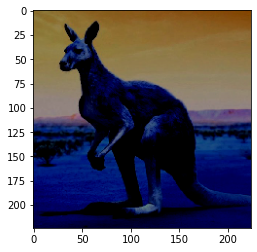

In [13]:
import matplotlib.pyplot as plt
plt.imshow(x[0] / 255.)

## Fine-tuning a model to your data

Very often, however, your image classification problem will not match ImageNet classes.
In such cases, a typical strategy consists in fine-tuning an existing model to your problem.
This is done by learning only the fully connected layers at the ouput of the model and keep other layers freezed.

When loading weights from a pretrained model, `keras` offers an option to remove the classification layers and freeze weights of the convolutional layers:

```python
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])
for layer in base_model.layers:
  layer.trainable = False
```

Note that here, we provide the image shape when re-building the `ResNet50` model so that, if that shape is not the one of ImageNet images, `keras` will still be able to compute all tensor shapes in the network automatically.

From that point, `base_model` can be used in a `Sequential` model as if it were a single layer, which makes it feasible to plug new layers at the output of the `ResNet50` convolutions.

### The dataset

In this notebook, you will work with a new dataset that cannot be loaded via `keras.datasets` module.
The images should be [downloaded](https://drive.google.com/drive/folders/1_hs6-moToZkCgiub7eXyJmAm7zVT2tNo?usp=sharing) and stored in a subfolder named `./cats_and_dogs/`.

Check that you can access the data by running:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls '/content/drive/My Drive/cats_and_dogs'

test_catdog  train_catdog


The last line of the output above should be:
```
test_catdog  train_catdog
```

Then the data should be loaded using the following functions:

In [14]:
import os

def load_cats_and_dogs_folder(path, target_size=None, verbose=True):
    X = []
    y = []
    i = 0
    for fname in os.listdir(path):
        if 'cat' in fname:
            X.append(
                np.array(image.load_img(path+fname, target_size=target_size))
            )
            y.append(0)
        elif 'dog' in fname:
            X.append(
                np.array(image.load_img(path+fname, target_size=target_size))
            )
            y.append(1)
        i+=1
        if verbose and i % 50 == 0:
            print('{0:.2f} % loaded'.format(100*(i/len(os.listdir(path)))))
    return np.array(X), np.array(y)

def load_preprocessed_cats_and_dogs(base_folder, target_size=None, 
                                    verbose=True):
    if verbose:
        print("Loading training set")
    X_train, y_train = load_cats_and_dogs_folder(base_folder + "/train_catdog/", 
                                                 target_size=target_size,
                                                 verbose=verbose)
    X_train = preprocess_input(X_train)

    if verbose:
        print("Loading test set")
    X_test, y_test = load_cats_and_dogs_folder(base_folder + "/test_catdog/", 
                                               target_size=target_size,
                                               verbose=verbose)
    X_test = preprocess_input(X_test)

    return X_train, X_test, y_train, y_test

# The call is here:
X_train, X_test, y_train, y_test = load_preprocessed_cats_and_dogs(
    '/content/drive/My Drive/cats_and_dogs', target_size=(200, 200)
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 

Loading training set
9.96 % loaded
19.92 % loaded
29.88 % loaded
39.84 % loaded
49.80 % loaded
59.76 % loaded
69.72 % loaded
79.68 % loaded
89.64 % loaded
99.60 % loaded
Loading test set
10.00 % loaded
20.00 % loaded
30.00 % loaded
40.00 % loaded
50.00 % loaded
60.00 % loaded
70.00 % loaded
80.00 % loaded
90.00 % loaded
100.00 % loaded
(502, 200, 200, 3) (502,) (500, 200, 200, 3) (500,)


### The model

**Question 5.** Now you will:

1. use convolution layers from a pre-trained `ResNet50` model and freeze them;
2. plug an additional logistic regression layer;
3. compile the full model;
4. observe the performance of such a model on your Cat vs Dog problem.

In [18]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])
for layer in base_model.layers:
  layer.trainable = False

model = Sequential([
      base_model,
      Flatten(),
      Dense(units=1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=100)

Epoch 1/3
6/6 [==============================] - 11s 1s/step - loss: 0.8063 - accuracy: 0.7988 - val_loss: 0.2261 - val_accuracy: 0.9660
Epoch 2/3
6/6 [==============================] - 8s 2s/step - loss: 0.1515 - accuracy: 0.9841 - val_loss: 0.1693 - val_accuracy: 0.9800
Epoch 3/3
6/6 [==============================] - 8s 2s/step - loss: 0.0034 - accuracy: 0.9980 - val_loss: 0.1498 - val_accuracy: 0.9820


In [19]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 1)                 100353    
                                                                 
Total params: 23,688,065
Trainable params: 100,353
Non-trainable params: 23,587,712
_________________________________________________________________


**Question 6.** Starting from the model you got at the previous stage, fine-tune _all_ the weights in this model
(even the convolution ones) using a learning rate of .00001 (1e-5). See if this improves on performance.

In [20]:
from tensorflow.keras.optimizers import Adam

for layer in base_model.layers:
  layer.trainable = True
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=1e-5), metrics=["accuracy"])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/3
6/6 [==============================] - 28s 3s/step - loss: 0.0478 - accuracy: 0.9900 - val_loss: 0.1560 - val_accuracy: 0.9820
Epoch 2/3
6/6 [==============================] - 14s 2s/step - loss: 7.9032e-05 - accuracy: 1.0000 - val_loss: 0.1569 - val_accuracy: 0.9800
Epoch 3/3
6/6 [==============================] - 14s 2s/step - loss: 9.0058e-05 - accuracy: 1.0000 - val_loss: 0.1595 - val_accuracy: 0.9800
